In [22]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance.Result import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_exfiltration_time_df, get_data_exfiltration_cdf, total_control_host_capture_times
from statistics import mean
import seaborn as sns
# set seaborn font size
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("pastel")

import pandas as pd

In [6]:
# Equifax 
equifax_reactiveSimple_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/equifax_reactiveSimple'))
equifax_advancedReactive_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d10_h0'))
equifax_advancedReactive_d0_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d0_h50'))
equifax_advancedReactive_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d10_h50'))
equifax_advancedReactive_layered_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveLayered_d10_h50'))


In [7]:
equifax_reactiveSimple_d10_h0_times = get_exfiltration_time_df(equifax_reactiveSimple_d10_h0, 48, 'targeted_reactiveSimple_d10_h0')
equifax_advancedReactive_d10_h0_times = get_exfiltration_time_df(equifax_advancedReactive_d10_h0, 48, 'targeted_advancedReactive_d10_h0')
equifax_advancedReactive_d0_h50_times = get_exfiltration_time_df(equifax_advancedReactive_d0_h50, 48, 'targeted_advancedReactive_d0_h50')
equifax_advancedReactive_d10_h50_times = get_exfiltration_time_df(equifax_advancedReactive_d10_h50, 48, 'targeted_advancedReactive_d10_h50')
equifax_advancedReactive_layered_d10_h50_times = get_exfiltration_time_df(equifax_advancedReactive_layered_d10_h50, 48, 'targeted_advancedReactive_d10_h50')

# Merge dfs into 1 df
equifax_data = pd.concat([equifax_reactiveSimple_d10_h0_times,
                          equifax_advancedReactive_d10_h0_times, 
                          equifax_advancedReactive_d0_h50_times, 
                          equifax_advancedReactive_d10_h50_times,
                          equifax_advancedReactive_layered_d10_h50_times])

In [22]:
equifax_data_agg = (
    equifax_data.groupby('experiment')
    .agg({'percent_files_exfiltrated': {'median'}, 'time_exfiltrated': 'median', 'defender': 'first', 'attacker': 'first'})
    .reset_index()
)
equifax_data_agg

,experiment,percent_files_exfiltrated,time_exfiltrated,defender,attacker
,,median,time_exfiltrated,defender,attacker
0,baseline_reactiveLayered_d10_h50,10.416667,5.980108,targeted_advancedReactive_d10_h50,EquifaxBaselineAttacker
1,baseline_reactiveStandalone_d0_h50,13.541667,9.369579,targeted_advancedReactive_d0_h50,EquifaxBaselineAttacker
2,baseline_reactiveStandalone_d10_h0,100.000000,39.282219,targeted_advancedReactive_d10_h0,EquifaxBaselineAttacker
3,baseline_reactiveStandalone_d10_h50,14.583333,8.730047,targeted_advancedReactive_d10_h50,EquifaxBaselineAttacker
4,equifax_reactiveSimple,100.000000,42.761592,targeted_reactiveSimple_d10_h0,equifax_baseline


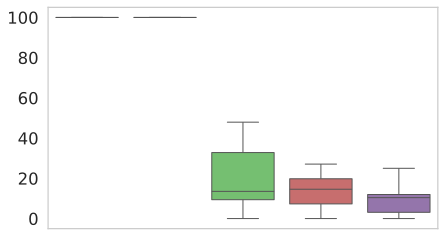

In [21]:
# Box plot
plt.figure(figsize=(7, 4))
sns.boxplot(data=equifax_data, x='experiment', y='percent_files_exfiltrated',
            hue='experiment', palette='muted', showfliers=False)

plt.xlabel('')
plt.ylabel('')
plt.xticks([])

plt.savefig('plots/equifax_advancedReactive.svg', transparent=True, bbox_inches='tight')